# PRE / PSE LOCA +5900 - Nivel en Pileta

In [1]:
#Realizo la llamada a los paquetes a Utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Lectura del Archivo

In [2]:
datos = pd.read_csv(r"C:\Users\User0044\Practica IAE\IAE_simulacion 2.csv",low_memory=False) #Realizo la lectura de CSV y lo asocio al DataFrame "datos"

## 2. Visualizacion General del DataFrame 

In [3]:
datos.head(20) #Primero 20 filas del DataFrame

,SimTime,G_0600_EXTRA_Lev_PRE,Log
0,-7500,12.5970,NaN
1,0,12.5970,All modules prepared\nRunning at: 100x of Real...
2,100,12.5970,NaN
3,200,12.5970,NaN
4,300,12.5970,NaN
5,400,12.5970,NaN
6,500,12.5970,NaN
7,600,12.5970,NaN
8,700,12.5970,NaN
9,800,12.5970,NaN


In [4]:
datos.tail(20) #Ultimas 5 filas del DataFrame

,SimTime,G_0600_EXTRA_Lev_PRE,Log
1368584,136858300,5.90000,NaN
1368585,136858400,5.90000,NaN
1368586,136858500,5.90000,NaN
1368587,136858600,5.90000,NaN
1368588,136858700,5.90000,NaN
1368589,136858800,5.90000,NaN
1368590,136858900,5.89996,NaN
1368591,136859000,5.89991,NaN
1368592,136859100,5.89991,NaN
1368593,136859200,5.89992,NaN


In [5]:
datos.info() #Reralizo una Visualizacion general de las caracteristicas del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368604 entries, 0 to 1368603
Data columns (total 3 columns):
SimTime                 1368604 non-null int64
G_0600_EXTRA_Lev_PRE    1368604 non-null float64
Log                     930 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 31.3+ MB


In [6]:
datos.columns #Visualizo las columnas del DataFrame

Index(['SimTime', 'G_0600_EXTRA_Lev_PRE', 'Log'], dtype='object')

In [7]:
datos.dtypes #Tipos de datos de cada columna

SimTime                   int64
G_0600_EXTRA_Lev_PRE    float64
Log                      object
dtype: object

## 3. Analisis de valores Nulos y Anormales

In [8]:
datos.isnull().sum() #Cuento la cantidad de nulos que tiene cada columna

SimTime                       0
G_0600_EXTRA_Lev_PRE          0
Log                     1367674
dtype: int64

Segun se observa la columna Log tiene una cantidad muy grande de nulos, los cuales seguramente corresponden a los datos de inicio/fin de simulacion y correspondiente a OOS (out of scope). Por este motivo procedo a borrar esta columna por completo:

In [9]:
datos_new = datos.drop("Log",axis=1)

In [10]:
datos_new.info() #Verifico que la columna "Log" se borro

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368604 entries, 0 to 1368603
Data columns (total 2 columns):
SimTime                 1368604 non-null int64
G_0600_EXTRA_Lev_PRE    1368604 non-null float64
dtypes: float64(1), int64(1)
memory usage: 20.9 MB


In [11]:
datos_new.head()#Primero 5 filas del DataFrame

,SimTime,G_0600_EXTRA_Lev_PRE
0,-7500,12.597
1,0,12.597
2,100,12.597
3,200,12.597
4,300,12.597


In [12]:
datos_new.tail() #Ultimas 5 filas del DataFrame

,SimTime,G_0600_EXTRA_Lev_PRE
1368599,136859800,5.89992
1368600,136859900,5.89992
1368601,136860000,5.89992
1368602,136860100,5.89992
1368603,136860200,5.89992


Segun se observa la primera fila corresponde a tiempos anteriores al inicio de la simulacion y deben estar relacionados con valores iniciales del simulador. Estos valores no sirven para el proposito del analisis y por lo tanto proceso a borrarlos

In [13]:
datos_new_1 = datos_new.drop([0],axis=0)

In [14]:
datos_new_1.head()

,SimTime,G_0600_EXTRA_Lev_PRE
1,0,12.597
2,100,12.597
3,200,12.597
4,300,12.597
5,400,12.597


## 4. Configuracion Columna "Tiempo" 

In [15]:
datos_new_1["SimTime"] = (datos_new_1["SimTime"]/(1000*3600)) #Configuro la columna SimTime para que tenga unidades de segundos

In [16]:
datos_new_1.head()

,SimTime,G_0600_EXTRA_Lev_PRE
1,0.000000,12.597
2,0.000028,12.597
3,0.000056,12.597
4,0.000083,12.597
5,0.000111,12.597


In [17]:
datos_new_1.tail()

,SimTime,G_0600_EXTRA_Lev_PRE
1368599,38.016611,5.89992
1368600,38.016639,5.89992
1368601,38.016667,5.89992
1368602,38.016694,5.89992
1368603,38.016722,5.89992


# 5. Graficos

### 5.1 Nivel Tanque BR001A

In [18]:
t = datos_new_1["SimTime"]

a = datos_new_1["G_0600_EXTRA_Lev_PRE"]

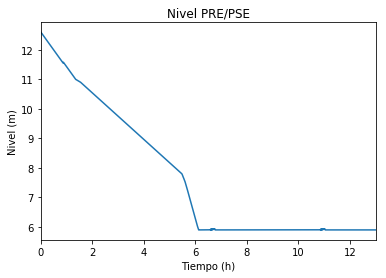

In [19]:
plt.plot(t,a)
plt.xlim(0,13)

plt.xlabel("Tiempo (h)")
plt.ylabel("Nivel (m)")
plt.title("Nivel PRE/PSE")

plt.show()

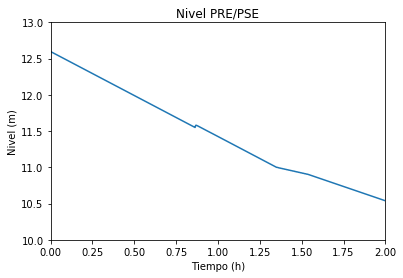

In [20]:
plt.plot(t,a)
plt.xlim(0,2)
plt.ylim(10,13)

plt.xlabel("Tiempo (h)")
plt.ylabel("Nivel (m)")
plt.title("Nivel PRE/PSE")

plt.show()

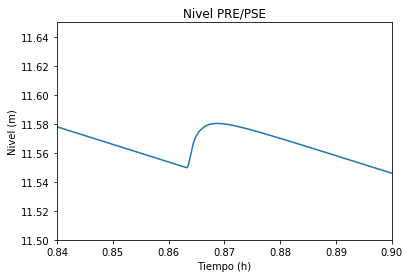

In [21]:
plt.plot(t,a)
plt.xlim(0.84,0.9)
plt.ylim(11.5,11.65)

plt.xlabel("Tiempo (h)")
plt.ylabel("Nivel (m)")
plt.title("Nivel PRE/PSE")

plt.show()

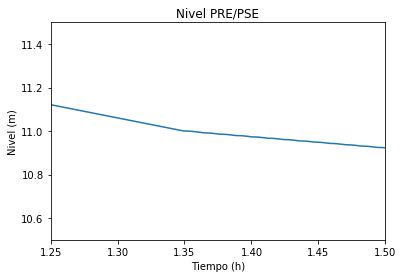

In [22]:
plt.plot(t,a)
plt.xlim(1.25,1.5)
plt.ylim(10.5,11.5)

plt.xlabel("Tiempo (h)")
plt.ylabel("Nivel (m)")
plt.title("Nivel PRE/PSE")

plt.show()

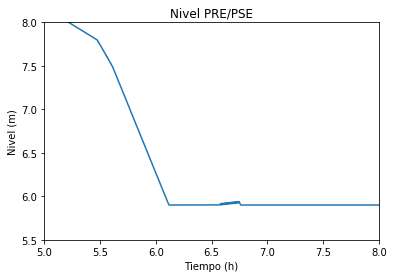

In [23]:
plt.plot(t,a)
plt.xlim(5,8)
plt.ylim(5.5,8)

plt.xlabel("Tiempo (h)")
plt.ylabel("Nivel (m)")
plt.title("Nivel PRE/PSE")

plt.show()

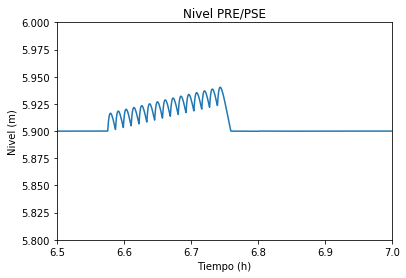

In [24]:
plt.plot(t,a)
plt.xlim(6.5,7)
plt.ylim(5.8,6)

plt.xlabel("Tiempo (h)")
plt.ylabel("Nivel (m)")
plt.title("Nivel PRE/PSE")

plt.show()

## Valor temporal al cual la pileta llega al valor +6.00

In [40]:
datos_new_1[datos_new_1["G_0600_EXTRA_Lev_PRE"]<6].head(1)

,SimTime,G_0600_EXTRA_Lev_PRE
219076,6.085417,5.99998
